<img src="CC-BY-NC-ND.png" alt="Drawing" style="width: 150px;"/> 

**Auteur** : Christophe Jorssen

Commençons par importer les bibliothèques « classiques ».

In [ ]:
%matplotlib notebook

import numpy as np
from matplotlib import pyplot as plt

Nous utilisons ici le paquet [`fft`](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) de numpy afin de réaliser une analyse spectrale numérique en utilisant l'algorithme de transformée de Fourier rapide (*Fast Fourier Transform*).

In [ ]:
from numpy import fft as fft

Nous utilisons aussi [`wavefile`](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) du paquet `io` de `scipy` qui permet de lire un fichier `.wav`.

In [ ]:
import scipy.io.wavfile as wav

Enfin, nous utilisons un `widget` propre à `jupyter` qui permet de jouer un son *via* le navigateur.

In [ ]:
from IPython.display import Audio

`filename` est une chaîne de caractères contenant le chemin du fichier `.wav` contenant le son à étudier. Il y a en deux de disponible :
* `media/audacity-flute-alto-A440-44100.wav` qui est un fichier que j'ai enregistré ;
* `media/guitar_A4_very-long_forte_normal.wav` qui est un fichier extrait de la [base de données du Philharmonia Orchestra](https://www.philharmonia.co.uk/explore/sound_samples).

Je me sers du premier mais tu pourras t'amuser à utiliser le second.

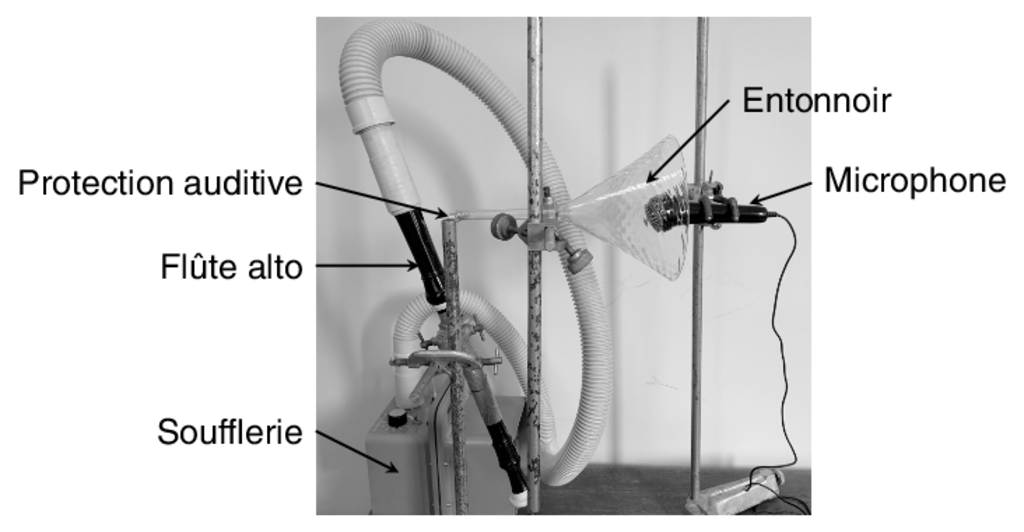

In [ ]:
filename = 'audacity-flute-alto-A440-44100.wav'
#filename = 'guitar_A4_very-long_forte_normal.wav'

Lors de la lecture du fichier `.wav`, `wavefile` renvoie la fréquence d'échantillonnage (`f_sampling`) en hertz et un `ndarray` contenant les échantillons (`sampled_wave`).

In [ ]:
f_sampling, sampled_wave = wav.read(filename)

Te rappelles-tu de la fréquence d'échantillonnage couramment utilisée en audio ? Tu peux vérifier !

In [ ]:
f_sampling

Grâce à la ligne suivante, `jupyter` te permet de jouer le son dans ton navigateur.

In [ ]:
Audio(filename)

On définit le nombre d'échantillons `N_samples` (c'est tout simplement le nombre d'éléments de `sampled_wave`) et la durée de l'échantillon `duration`.

In [ ]:
N_samples = sampled_wave.size
duration = N_samples / f_sampling

Ça fait pas mal d'échantillons !

In [ ]:
N_samples

La période d'échantillonnage `T_sampling` permet d'obtenir les dates `t` des échantillons.

In [ ]:
T_sampling = 1 / f_sampling

t = T_sampling * np.arange(0, N_samples)

Et on peut maintenant tracer l'échantillon. 

In [ ]:
fig1, ax = plt.subplots()

ax.plot(t, sampled_wave)
ax.set_xlabel(r'$t$ (s)')
ax.set_ylabel('Amplitude (unité arbitraire)')
fig1.show()

De nouveau, on voit qu'il y a beaucoup d'échantillons... Ce n'est pas très lisible. C'est typiquement ce que tu as pu voir en terminale dans un logiciel comme [audacity](https://www.audacityteam.org/).

Je te propose que nous nous intéressions à un échantillon réduit : nous n'allons considérer que les $2^{10}$ premiers échantillons du fichier `.wav`.

In [ ]:
fig2, ax2 = plt.subplots()

ax2.plot(t[:2**10], sampled_wave[:2**10])
ax2.set_xlabel(r'$t$ (s)')
ax2.set_ylabel('Amplitude (unité arbitraire)')
fig2.show()

Sympa, non ? On reconnaît bien la nature périodique de l'onde.

Passons à l'analyse spectrale numérique sur ce nombre `N_samples_fft` réduit d'échantillons (pour que l'algorithme FFT fonctionne correctement, il faut que ce nombre soit une puissance de $2$).

In [ ]:
N_samples_fft = 2**10
if N_samples_fft > N_samples:
    print('N_samples_fft trop grand')
amplitude_spectrum = np.abs(fft.fft(sampled_wave[:N_samples_fft]))
phase_spectrum = np.angle(fft.fft(sampled_wave[:N_samples_fft]))
normalized_amplitude_spectrum = amplitude_spectrum / amplitude_spectrum.max()

On définit les fréquences discrètes associées à l'analyse spectrale numérique (le critère de Shannon impose la fréquence maximale donnée par l'analyse spectrale numérique comme étant égale à la moitié de la fréquence d'échantillonnage).

In [ ]:
f = f_sampling * np.arange(0, N_samples_fft // 2) / N_samples_fft

On trace le spectre en amplitude. Que constates-tu ? Où sont les pics ?

In [ ]:
fig3, ax3 = plt.subplots()
ax3.vlines(f, [0], normalized_amplitude_spectrum[:N_samples_fft // 2], 'r')
fig3.show()

Pour s'amuser, on peut vérifier que l'analyse spectrale numérique fournit une décomposition de Fourier correcte en recomposant le signal à partir des composantes spectrales.

In [ ]:
t_fft = T_sampling * np.arange(0, N_samples_fft)
wave = np.zeros(N_samples_fft)
for i in range(N_samples_fft // 2):
    wave += amplitude_spectrum[i] * np.cos(2 * np.pi * f[i] * t_fft + phase_spectrum[i])

Et traçons le résultat.

In [ ]:
fig4, ax4 = plt.subplots()
ax4.plot(t_fft, wave / N_samples_fft * 2)
fig4.show()

Ça y ressemble ! Écoutons le résultat.

In [ ]:
Audio(wave, rate = f_sampling)